# Linear Regression 1 Year Mortality

Linear regression model implemented with 

In [38]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.linear_model import LinearRegression

%run ImportPlotFunctions.ipynb

## Load Data 1 Year Mortality

In [39]:
%run LoadData1Y.ipynb

Loaded 1 Year Train Sample:
X_train shape: (38857, 106)
y shape: (38857,)
Loaded 1 Year Test Sample:
X_test shape: (19139, 106)
y_test shape: (19139,)


## Linear Regression

In [40]:
clf = LinearRegression(
    n_jobs=-1,
).fit(X_train, y_train)

## Analyze Results

In [41]:
print("Score: ", clf.score(X_test, y_test))
y_score = clf.predict(X_test)

Score:  0.32743651919843175


## Save Results

In [42]:
np.savetxt("y_score_1y_linreg.csv", y_score, delimiter=",")

## Feature Importance

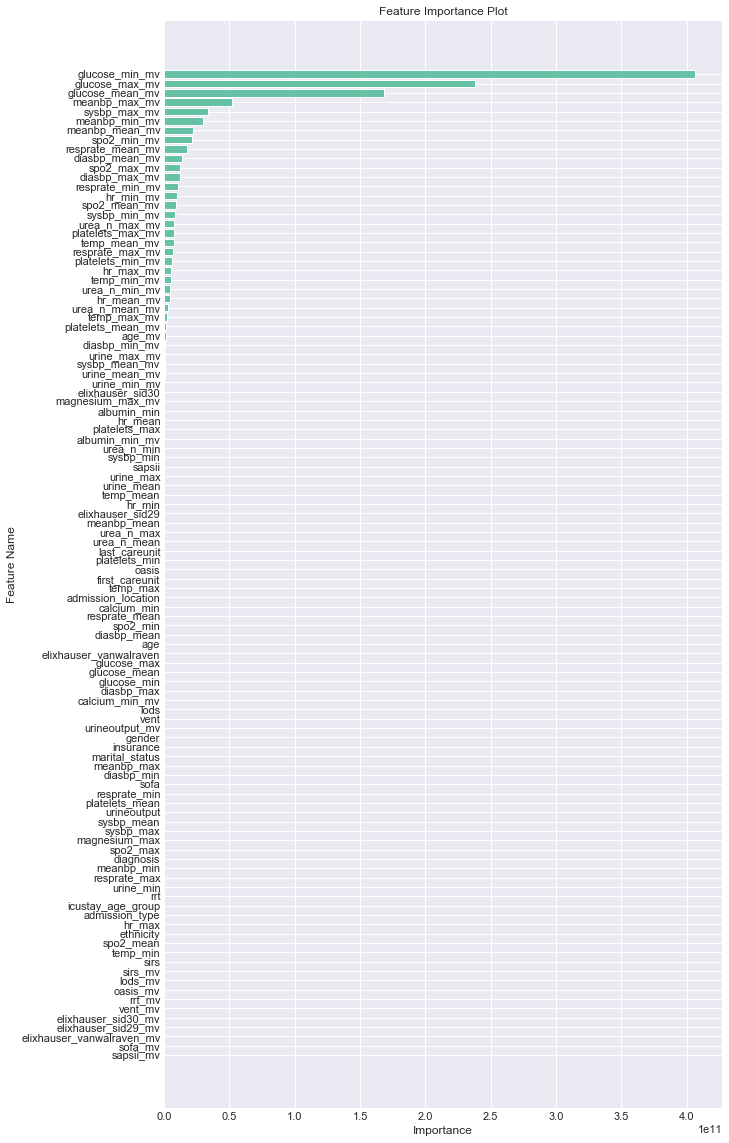

In [43]:
names = X_test.columns.tolist()
values = np.abs(clf.coef_)
feature_importance_bar(names, values, figsize=(10, 20))

## Precision Recall Curve

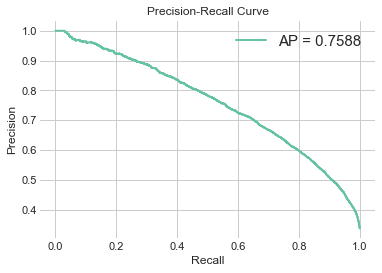

In [44]:
plot_PRC(y_test, y_score)

## ROC Curve

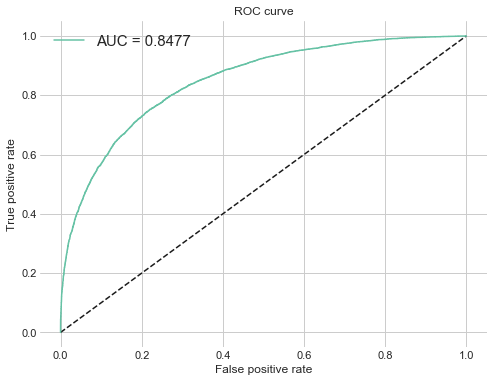

In [45]:
plot_ROC(y_test, y_score)

## Confusion Matrix

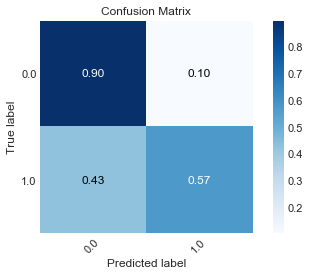

In [46]:
plot_cm(y_test, y_score)